In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
#read in dataset
insurance = pd.read_csv("..\..\datasets\insurance.csv")

In [3]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
insurance['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [7]:
clean_insurance = pd.get_dummies(insurance)

In [8]:
clean_insurance.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [9]:
clean_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   sex_female        1338 non-null   uint8  
 5   sex_male          1338 non-null   uint8  
 6   smoker_no         1338 non-null   uint8  
 7   smoker_yes        1338 non-null   uint8  
 8   region_northeast  1338 non-null   uint8  
 9   region_northwest  1338 non-null   uint8  
 10  region_southeast  1338 non-null   uint8  
 11  region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(2), uint8(8)
memory usage: 52.4 KB


In [10]:
clean_insurance.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [11]:
X = clean_insurance[['age', 'bmi', 'children', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest']]
y= clean_insurance['charges']

In [12]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [13]:
y = pd.DataFrame(y)

Train-Test-Split

In [14]:
#portion = 0.75
#index = int(len(X)*portion)+1
#index

In [15]:
#X_train = X.iloc[:index]
#y_train = y.iloc[:index]

In [16]:
#X_test = X.iloc[index:]
#y_test = y.iloc[index:]

In [17]:
#len(X_train)/len(X)

In [18]:
#len(X_test),len(y_test),len(X_train), len(y_train)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
len(X_test),len(y_test),len(X_train), len(y_train)

(268, 268, 1070, 1070)

In [21]:
X_train.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.95,2,1,0,1,0,0,1,0,0
1285,47,24.32,0,1,0,1,0,1,0,0,0
1142,52,24.86,0,1,0,1,0,0,0,1,0
969,39,34.32,5,1,0,1,0,0,0,1,0
486,54,21.47,3,1,0,1,0,0,1,0,0


Building the model

In [22]:
len(X_train.columns)

11

In [23]:
tf.random.set_seed(42)

model = tf.keras.Sequential(name = 'insurance_model')

model.add(tf.keras.layers.Dense(len(X_train.columns), name = 'input_layer'))
model.add(tf.keras.layers.Dense(1,  name = 'output_layer'))

model.compile(loss = tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
             metrics = ['mae'])

In [24]:
model.fit(X_train, y_train, epochs=100, verbose = 0)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



Evaluate

In [25]:
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 445us/step - loss: 6899.5874 - mae: 6899.5874


[6899.58740234375, 6899.58740234375]

In [26]:
y_train.median()

charges    9575.4421
dtype: float64

In [27]:
y_train.mean()

charges    13346.089736
dtype: float64

### Tweak


In [28]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential(name = 'insurance_model')

model_2.add(tf.keras.layers.Dense(100, name = 'input_layer'))
model_2.add(tf.keras.layers.Dense(10))
model_2.add(tf.keras.layers.Dense(1,  name = 'output_layer'))

model_2.compile(loss = tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(), # SGD -> Adam
             metrics = ['mae'])

In [29]:
model_2.fit(X_train, y_train, epochs = 100, verbose =0)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



In [30]:
model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 556us/step - loss: 4924.3477 - mae: 4924.3477


[4924.34765625, 4924.34765625]

In [31]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential(name = 'insurance_model')

model_3.add(tf.keras.layers.Dense(100, name = 'input_layer'))
model_3.add(tf.keras.layers.Dense(10))
model_3.add(tf.keras.layers.Dense(1,  name = 'output_layer'))

model_3.compile(loss = tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(), # SGD -> Adam
             metrics = ['mae'])

In [32]:
history_3 = model_3.fit(X_train, y_train, epochs=200, verbose =0)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



In [33]:
model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 556us/step - loss: 3491.2961 - mae: 3491.2961


[3491.296142578125, 3491.296142578125]

Text(0.5, 0, 'epochs')

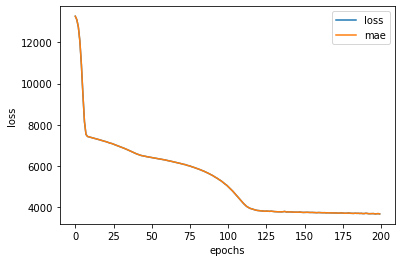

In [34]:
#plot history
pd.DataFrame(history_3.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

***How long should you train?***  <br>
Tensorflow offers help with early stopping callback

In [35]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential(name = 'insurance_model')

model_4.add(tf.keras.layers.Dense(10, name = 'input_layer'))
model_4.add(tf.keras.layers.Dense(10))
model_4.add(tf.keras.layers.Dense(10))
model_4.add(tf.keras.layers.Dense(1,  name = 'output_layer'))

model_4.compile(loss = tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(), # SGD -> Adam
             metrics = ['mae'])

In [36]:
history_4 = model_4.fit(X_train, y_train, epochs=200, verbose =0)
model_4.evaluate(X_test, y_test)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

9/9 [==============================] - 0s 556us/step - loss: 3514.9495 - mae: 3514.9495


[3514.949462890625, 3514.949462890625]

Text(0.5, 0, 'epochs')

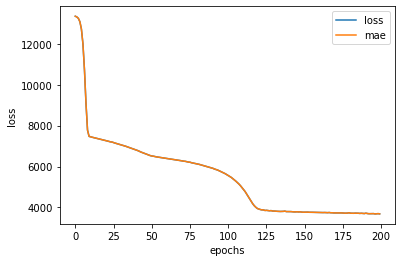

In [37]:
pd.DataFrame(history_4.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

In [38]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential(name = 'insurance_model')

model_5.add(tf.keras.layers.Dense(10, name = 'input_layer'))
model_5.add(tf.keras.layers.Dense(10))
model_5.add(tf.keras.layers.Dense(10))
model_5.add(tf.keras.layers.Dense(10))
model_5.add(tf.keras.layers.Dense(1,  name = 'output_layer'))

model_5.compile(loss = tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(), # SGD -> Adam
             metrics = ['mae'])


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

9/9 [==============================] - 0s 556us/step - loss: 3174.7820 - mae: 3174.7820


Text(0.5, 0, 'epochs')

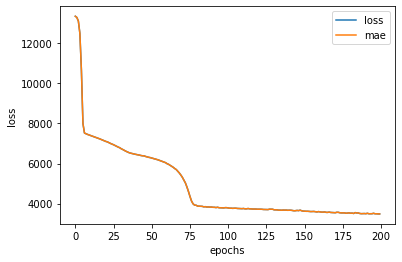

In [39]:
history_5 = model_5.fit(X_train, y_train, epochs=200, verbose =0)
model_5.evaluate(X_test, y_test)
pd.DataFrame(history_5.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

### Preporcessing Data (Normalization)

In [40]:
X.head(10)

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
5,31,25.740,0,1,0,1,0,0,0,1,0
6,46,33.440,1,1,0,1,0,0,0,1,0
7,37,27.740,3,1,0,1,0,0,1,0,0
8,37,29.830,2,0,1,1,0,1,0,0,0
9,60,25.840,0,1,0,1,0,0,1,0,0


<AxesSubplot:ylabel='Frequency'>

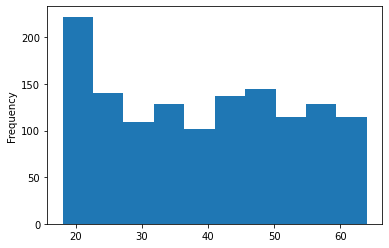

In [46]:
X['age'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

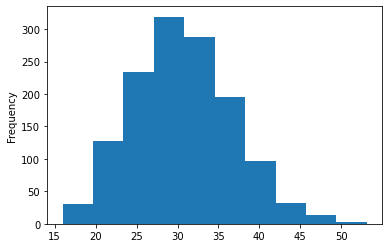

In [47]:
X['bmi'].plot(kind='hist')

In [48]:
X['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

Neural networks prefer normalized value